# Assignment 8
### Christopher Rodgers
### 29 Apr 2024

### The libraries you will use are already loaded for you below

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

## Question 1
Read in the two Netflix CSV files from /Data/Netflix as pandas dataframes. Print the number of unique genres. This is not as simple as it sounds. You cannot simply find the length of `titles['genres'].unique()`. You must convert the output of that code to a list, iterate over that list and replace the following characters: `[]',`. Once you have them replace you can split the individual strings to list items and flatten the list. I have already imported the `chain()` function for you to flatten the list. Look up the documentation to see its usage. There are 19 unique genres, but I want you to write the code to find them. 

In [3]:
# your code here
titles_df = pd.read_csv('C:/Users/crodg/Documents/DSE5002/DSE5002/Week 8/titles.csv')
net_credits_df = pd.read_csv('C:/Users/crodg/Documents/DSE5002/DSE5002/Week 8/credits.csv')

genres_unique = titles_df['genres'].unique()

char_remove=['[',']','\'',',']

for char in char_remove: 
    genres_unique = [ele.replace(char, '') for ele in genres_unique]

genres_unique_list = list()

for element in genres_unique:
    genres_unique_list.append(element.split(' '))

genres_unique_list = list(chain(*genres_unique_list))

genres_unique_list = list(set(genres_unique_list))

print(genres_unique_list)
    

['', 'european', 'scifi', 'comedy', 'fantasy', 'documentation', 'horror', 'animation', 'music', 'reality', 'crime', 'action', 'thriller', 'war', 'sport', 'romance', 'drama', 'western', 'history', 'family']


## Question 2
Print the release year and the imdb score of the highest average score of all movies by year. This is trickier than it sounds. To do this you will need to aggregate the means by year. If you use the simple method you will get a pandas series. The series will need to be converted to a dataframe and the index will need to be set as a column (release year). Once you have done that you can find the numerical index with the highest average imdb score. 

In [4]:
# your code here
by_year_avg_imbd = titles_df.groupby('release_year') ['imdb_score'].mean()

row_avg = by_year_avg_imbd.idxmax()

print("Years Released", row_avg)
print("High Average Score by imdb;", by_year_avg_imbd[row_avg])


Years Released 1985
High Average Score by imdb; 8.0


## Question 3
There were 208 actors in the movie with the most credited actors. What is the title of that movie? Nulls and NaN values do not count. 

In [5]:
# your code here
movie_credit_df = titles_df.merge(net_credits_df, on='id')

movie_credit_df = movie_credit_df.dropna(subset=['name'])

movie_actor_credit = movie_credit_df.groupby('title')['name'].nunique()

credit_movie_actor = movie_actor_credit.idxmax()

movie_actor_credit = movie_actor_credit.max()

print("Movie:", credit_movie_actor)
print("Total Actors:", movie_actor_credit)

Movie: Les Misérables
Total Actors: 208


## Question 4
Which movie has the highest IMDB score for the actor Robert De Niro? What year was it made? Create a kdeplot (kernel density estimation to show the distribution of his IMDB movie scores. 

In [6]:
# your code here
robert_de_niro_movies = movie_credit_df[movie_credit_df['name'] == 'Robert De Niro']

highest_imdb_movie = robert_de_niro_movies.loc[robert_de_niro_movies['imdb_score'].idxmax()]

year_highest_imdb = highest_imdb_movie['release_year']

print("Movie with the highest IMDb score for Robert De Niro:", highest_imdb_movie['title'])
print("Year it was made:", year_highest_imdb)

Movie with the highest IMDb score for Robert De Niro: Taxi Driver
Year it was made: 1976


C:\Users\crodg\AppData\Local\Temp\ipykernel_16380\1685965162.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(robert_de_niro_imdb_scores, shade=True)
C:\Users\crodg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


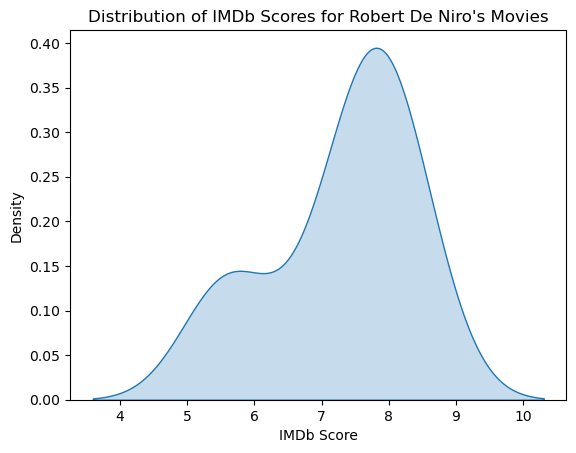

In [7]:
robert_de_niro_imdb_scores = robert_de_niro_movies['imdb_score']

sns.kdeplot(robert_de_niro_imdb_scores, shade=True)
plt.title("Distribution of IMDb Scores for Robert De Niro's Movies")
plt.xlabel("IMDb Score")
plt.ylabel("Density")
plt.show()

## Question 5
Create two new boolean columns in the titles dataframe that are true when the description contains war or gangster. Call these columns `war_movies` and `gangster_movies`. How many movies are there in both categories? Which category has a higher average IMDB score? Show the IMDB score kernel density estimations of both categories.


In [8]:
titles_df['description'].fillna('', inplace=True)

titles_df['gangster_movies'] = titles_df['description'].str.contains('gangster', case=False)

print("Number of War Movies:", num_war_movies)
print("Number of Gangster Movies:", num_gangster_movies)


NameError: name 'num_war_movies' is not defined

In [ ]:
titles_df['war_movies'] = titles_df['description'].str.contains('war', case=False)
titles_df['gangster_movies'] = titles_df['description'].str.contains('gangster', case=False)


char_remove=['[',']','\'',',']
for char in char_remove: 
    titles_df['genres'] = titles_df['genres'].str.replace(char, '')


avg_imdb_war_movies = titles_df.loc[titles_df['war_movies'], 'imdb_score'].mean()
avg_imdb_gangster_movies = titles_df.loc[titles_df['gangster_movies'], 'imdb_score'].mean()

print("Average IMDb Score for War Movies:", avg_imdb_war_movies)
print("Average IMDb Score for Gangster Movies:", avg_imdb_gangster_movies)

In [ ]:
war_imdb_scores = titles_df.loc[titles_df['war_movies'], 'imdb_score']

gangster_imdb_scores = titles_df.loc[titles_df['gangster_movies'], 'imdb_score']

plt.figure(figsize=(10, 6))
sns.kdeplot(war_imdb_scores, label="War Movies", shade=True)
sns.kdeplot(gangster_imdb_scores, label="Gangster Movies", shade=True)
plt.title("IMDb Score Distribution of War and Gangster Movies")
plt.xlabel("IMDb Score")
plt.ylabel("Density")
plt.legend()
plt.show()
